In [4]:
import numpy as np
import pandas as pd
# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.models import word2vec

In [2]:
# load model
model = word2vec.Word2Vec.load('model_judge_d250_sg_s10_ep10.model')

In [4]:
# 找出相近詞
model.wv.most_similar('傷害')

[('挫傷', 0.6060279607772827),
 ('受', 0.6033015847206116),
 ('告訴人', 0.5965343713760376),
 ('傷勢', 0.569086492061615),
 ('曾秉玄受', 0.5617408752441406),
 ('俊安受', 0.5573511719703674),
 ('麗雪受', 0.5541390776634216),
 ('及', 0.5445051789283752),
 ('被告', 0.5442579984664917),
 ('絨受', 0.5424306988716125)]

In [5]:
# 找出反義詞
model.wv.most_similar(negative='傷害')

[('淡', 0.10989107191562653),
 ('另一半', 0.10236480832099915),
 ('東邊', 0.09762666374444962),
 ('泉源', 0.09434237331151962),
 ('中到', 0.0930478423833847),
 ('里程', 0.09164585173130035),
 ('職期間', 0.08638250082731247),
 ('早操', 0.08567246049642563),
 ('中研院', 0.08432596176862717),
 ('吹哨', 0.08416806906461716)]

In [ ]:
result = model.wv.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

In [12]:
def analogy(x1, x2, y1):
    result = model.wv.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [13]:
analogy('japan', 'japanese', 'australia')

'australian'

In [19]:
print(model.wv.doesnt_match("breakfast cereal dinner lunch".split()))

lunch


In [34]:
# load model
model = word2vec.Word2Vec.load('model_d250_s5_ep10.model')

In [6]:
# dataframe cosin

def most_similar(w2v_model, words, topn=10):
    similar_df = pd.DataFrame()
    for word in words:
        try:
            similar_words = pd.DataFrame(w2v_model.wv.most_similar(word, topn=topn), columns=[word, 'cosin'])
            similar_df = pd.concat([similar_df, similar_words], axis=1)
        except:
            print(word, "not found in Word2Vec model!")
    return similar_df


In [5]:
data = pd.read_csv('./feature_1207_12.csv', encoding='utf-8')
data

,其他,教育程度,Unnamed: 2,構成要件,Unnamed: 4,違法性,Unnamed: 6,罪責,Unnamed: 8,傷害方式,...,被告身心狀況,Unnamed: 26,被害身心狀況,Unnamed: 28,和解狀況,Unnamed: 30,告訴人和被告人之關係,Unnamed: 32,法官心證,Unnamed: 34
0,應予分論併罰,國小畢業,高中以下,傷害之犯意,傷害罪:1,不合於正當防衛,1.0,為累犯,1.0,徒手毆打,...,癲癇症,不良,癲癇症,不良,無法達成和、調解,有意願無成功,家庭成員關係,有血緣,未達於通常一般人不致有所懷疑,1.0
1,為想像競合犯,國小肄業,高中以下,傷害之不確定故意,傷害罪:1,尚符合正當防衛,0.0,不依刑法第47條第1項規定加重其刑,0.0,以頭撞擊,...,良性陣發性眩暈,不良,頸椎退化性脊椎炎,不良,無法達成和解,有意願無成功,家庭成員關係,有血緣,未達於一般人不致有所懷疑,1.0
2,洵不足採,初中畢業,高中以下,具有主觀上傷害之犯意,傷害罪:1,尚符合緊急避難,0.0,爰依刑法第62條前段之規定,2.0,推打,...,頸椎退化性脊椎炎,不良,高血壓,不良,無法達成調解,有意願無成功,有家庭暴力防治法第3條第4款規定之家庭成員關係,有血緣,無足採酌,1.0
3,依前揭規定加重其刑,初中肄業,高中以下,基於傷害,傷害罪:1,不合於緊急避難,1.0,符合自首要件,2.0,徒手推打,...,高血壓,不良,雙相情緒障礙症,不良,告訴人無和解意願,有意願無成功,有家庭暴力防治法第3條第1款規定之家庭成員關係,有血緣,犯後態度方面難以對被告為有利之考量,1.0
4,無因果關係,國中畢業,高中以下,毀敗或嚴重減損,重傷害:1,尚符合父母懲戒權,0.0,固為累犯,0.0,拳打腳踢,...,雙相情緒障礙症,不良,重度身心障礙,不良,有與告訴人和解之意願,有意願無成功,有家庭暴力防治法第3條第2款規定之家庭成員關係,有血緣,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# feature dataframe
features = data.drop(data.iloc[:,::2], axis=1)
features_list = []

for i in range(len(features.columns)):
    features_clean = features.iloc[:,i].dropna()#.valuse.tolist()
    for j in features_clean:
        features_list.append(j)
        
features_list
        
    


            
            
# keywords_list = features.values.tolist()
# keywords_list

['國小畢業',
 '國小肄業',
 '初中畢業',
 '初中肄業',
 '國中畢業',
 '國中肄業',
 '高中畢業',
 '高中肄業',
 '高職畢業',
 '高職肄業',
 '大學畢業',
 '大學肄業',
 '大專畢業',
 '大專肄業',
 '五專畢業',
 '五專肄業',
 '二專畢業',
 '二專肄業',
 '專科畢業',
 '專科肄業',
 '三專畢業',
 '三專肄業',
 '傷害之犯意',
 '傷害之不確定故意',
 '具有主觀上傷害之犯意',
 '基於傷害',
 '毀敗或嚴重減損',
 '毀敗或嚴重毀損',
 '未達毀敗或減損',
 '之重傷害結果而未遂',
 '重傷害之不確定故意',
 '重傷害之故意',
 '如經過相當之診治而能回復原狀',
 '或雖不能回復原狀而僅減衰其效用者',
 '仍不得謂為該款之重傷',
 '未有重傷害結果',
 '應以未遂論',
 '毀敗或嚴重減損',
 '毀敗或嚴重毀損',
 '之重傷害結果而未遂',
 '未達毀敗或減損',
 '基於使人受重傷害之犯意',
 '傷害他人身體之犯意',
 '無不能注意之情事',
 '無不能注意之情事',
 '無不能注意之情形',
 '竟疏未注意',
 '疏未注意上開注意義務',
 '違反上開注意義務',
 '違反前揭注意義務',
 '違反前開注意義務',
 '本應具有前揭注意義務',
 '本應具有前開注意義務',
 '本應具有上開注意義務',
 '具有相當因果關係',
 '本應審慎注意',
 '不合於正當防衛',
 '尚符合正當防衛',
 '尚符合緊急避難',
 '不合於緊急避難',
 '尚符合父母懲戒權',
 '不合於父母懲戒權',
 '尚符合教師懲戒權',
 '不合於教師懲戒權',
 '無正當防衛可言',
 '無主張正當防衛',
 '無主張防衛',
 '與正當防衛要件不合',
 '與正當防衛之要件不合',
 '難認符合正當防衛',
 '符合正當防衛而阻卻違法',
 '為累犯',
 '不依刑法第47條第1項規定加重其刑',
 '爰依刑法第62條前段之規定',
 '符合自首要件',
 '固為累犯',
 '無加重最低法定本刑之必要',
 '不再依刑法第47條第1項之規定',
 '瘖啞人士',
 '爰依刑法第20條規定減輕其刑',
 '爰依刑法第20條之規定減輕其刑',
 '刑法第5

In [48]:
most_similar(model, keywords)

洪聖祺 not found in Word2Vec model!
盧政良 not found in Word2Vec model!
黃柏 not found in Word2Vec model!
陳述 not found in Word2Vec model!
臺灣 not found in Word2Vec model!
基於 not found in Word2Vec model!
對於 not found in Word2Vec model!
案發現場 not found in Word2Vec model!
報告書 not found in Word2Vec model!
有無 not found in Word2Vec model!
刑事訴訟法 not found in Word2Vec model!
後來 not found in Word2Vec model!
案發地點 not found in Word2Vec model!
哭鬧 not found in Word2Vec model!
臺北市 not found in Word2Vec model!
犯罪事實 not found in Word2Vec model!
債務糾紛 not found in Word2Vec model!


,被告,cosin,被害人,cosin,詹以,cosin,同案,cosin,傷害,cosin,...,變形,cosin,詰問,cosin,並未,cosin,嬰兒,cosin,樣物,cosin
0,被告人,0.612479,家屬,0.573664,吳麗卿將,0.849485,余承諺,0.641195,之傷害,0.632423,...,凹陷,0.772036,核實前,0.638800,顯未,0.623954,搖晃症,0.645388,淡綠色,0.825804
1,人,0.610331,甲童,0.534342,徐坦認,0.840812,俞嘉鑫黃奕翔,0.597880,重傷害,0.515291,...,破損,0.723679,核實,0.634043,雖未,0.607353,搖晃,0.644458,跡經,0.824133
2,之,0.594608,楊陳美葉,0.529373,樓之美,0.838242,林梓穎,0.590857,傷害直系血親尊親屬,0.513908,...,凹損,0.681782,詰,0.611254,固未,0.600785,幼兒,0.636332,下護板,0.822622
3,告訴,0.588176,林添蘭,0.528469,幫吳,0.836921,瑞南,0.573121,鄭允,0.481994,...,扭曲,0.674498,進行主,0.604508,確未,0.599098,嬰幼兒,0.632659,肺門脈,0.815178
4,於,0.579804,賴聰智,0.528146,並先後撥,0.835630,阮遵時,0.551354,傷害等,0.481224,...,破裂,0.672926,檢視渠,0.603513,全未,0.564310,幼童,0.627486,邊條則,0.812515
5,為,0.549965,王港,0.514027,若林童,0.833763,鄭志皓,0.548540,重傷害未遂,0.477110,...,裂損,0.663870,核實時,0.599219,並沒有,0.542175,兒,0.615178,但裡,0.811507
6,其,0.538731,王聖賢,0.513171,走丙手,0.833735,許文聰,0.544753,揭無義務,0.472924,...,桿斷,0.657274,問已,0.593607,未見,0.533565,吳童,0.609796,小結晶,0.808731
7,在,0.520045,之家屬,0.511929,始由辰將,0.833607,江信德,0.543730,傷害致重傷害,0.471545,...,裂無法,0.652818,甲之反,0.592487,自承未,0.526768,指嬰,0.608887,血漬樣,0.806597
8,與,0.518512,蘇玄彥,0.511384,執欲以,0.832840,張熾崇及,0.542612,處拘,0.470757,...,凹,0.645401,結後進行,0.591256,未,0.523823,虐性,0.606886,兩小處,0.806486
9,有,0.517768,蕭雲煥,0.504712,柯淑惠將,0.832527,歐陽霖,0.537369,張美月,0.470448,...,受損,0.638111,盧春蘭顯,0.589221,並未見,0.521150,產兒,0.600328,顯藍色,0.803541


In [24]:
most_similar(model, 
             ['傷害', '重傷害', '傷害致死', '新臺幣', '家暴', '易科罰金', '毆打', '累犯', '再犯', '書記官', '致', '罪'])

,傷害,cos,重傷害,cos,傷害致死,cos,新臺幣,cos,家暴,cos,...,累犯,cos,再犯,cos,書記官,cos,致,cos,罪,cos
0,傷害直系血親尊親屬,0.611266,重傷,0.755266,傷害致重傷,0.744798,新台幣,0.904467,兒少,0.550780,...,之本罪,0.599303,措導致,0.622596,巫佳蒨,0.858663,致其,0.646041,罪四,0.709998
1,之傷害,0.607961,難治,0.657003,傷害致重傷害,0.722634,參萬,0.705939,虐童,0.547882,...,刑之罪,0.585693,之虞堪,0.605849,潘美靜,0.839326,而致,0.630367,罪二,0.709186
2,重傷害未遂,0.561708,視能,0.587669,重傷害未遂,0.707529,壹仟,0.696626,性侵,0.543603,...,罪與後案,0.556409,之虞因,0.605759,鄭仁榮,0.834659,致告訴,0.591663,罪五,0.698571
3,傷害致重傷害,0.552094,重傷害等,0.582916,重傷害致死,0.692359,壹萬元,0.676144,聽過,0.535373,...,案資料,0.550542,執畢後年,0.601358,張亞筑,0.828716,導致,0.580421,罪次,0.675073
4,重傷害,0.543977,之傷害,0.568542,過失傷害致重傷害,0.671989,以銀元,0.674622,貪污,0.530962,...,刑論,0.549474,之虞前,0.595633,鄭淑丰,0.814194,致使,0.553353,罪論科,0.668945
5,漏逸氣體,0.524969,能屬,0.565428,過失重傷害,0.654384,參仟元,0.674053,盡速將,0.525007,...,雖構,0.546007,之虞故,0.591025,官萬,0.806425,致甲,0.548617,罪二再,0.656658
6,重傷害致死,0.522375,毀敗,0.556526,業務過失致重傷害,0.645583,參萬元,0.673452,販毒,0.521864,...,其所構,0.540169,違法舉,0.591006,官林思辰,0.800591,並致,0.547083,罪三查,0.656356
7,罪共二罪,0.518188,語能,0.553885,業務過失重傷害,0.635483,以新壹幣,0.673294,背信,0.520595,...,選科,0.538474,知惕勵,0.589590,呂欣穎,0.800182,致雙方,0.530793,罪處斷,0.655684
8,博寰,0.515959,一肢,0.553863,傷害直系血親尊親屬等,0.634284,肆萬元,0.671841,作偽證,0.519914,...,本刑查,0.536292,信其應,0.586104,劉綺,0.798530,以致,0.530360,罪共罪,0.654205
9,人之身,0.513226,需調查,0.552898,過失致重傷害,0.631546,叁仟元,0.668842,虐待,0.517810,...,科不請求,0.536044,之效始,0.585102,官陳育君,0.793475,致證,0.530146,危安罪,0.653793


In [8]:
# 設定 matplotlib 字型，可顯示中文
import matplotlib
import matplotlib.font_manager
print(matplotlib.__file__)
# a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
# for i in a:
#     print(i)    
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']


def display_pca_scatterplot(model, words=None, sample=0):
    
        if words == None:
            if sample > 0:
                words = np.random.choice(model.wv.index_to_key, sample)
            else:
                words = [ word for word in model.wv.key_to_index ]
                
        word_vectors = np.array([model.wv[w] for w in words])

        twodim = PCA().fit_transform(word_vectors)[:,:2]
    
        plt.figure(figsize=(10,10))
        plt.scatter(twodim[:,0], twodim[:,1], edgecolors='face', c='#FF7575', marker='*')
        for word, (x,y) in zip(words, twodim):
            plt.text(x+0.05, y+0.05, word)
    

C:\Users\student\anaconda3\envs\python3\lib\site-packages\matplotlib\__init__.py


In [9]:
def display_pca_scatterplot(model, words=None, sample=0):
    
        if words == None:
            if sample > 0:
                words = np.random.choice(model.wv.index_to_key, sample)
            else:
                words = [ word for word in model.wv.key_to_index ]
                
        word_vectors = np.array([model.wv[w] for w in words])

        twodim = PCA().fit_transform(word_vectors)[:,:2]
    
        plt.figure(figsize=(10,10))
        plt.scatter(twodim[:,0], twodim[:,1], edgecolors='face', c='#FF7575', marker='o')
        for word, (x,y) in zip(words, twodim):
            plt.text(x+0.05, y+0.05, word) 

In [83]:
import pandas as pd
keywords = pd.read_csv('./判決書-傑八切過/重傷害致死.csv', header=None, encoding='utf-8')

# print(keywords)

words1 = keywords[0]
# print(words1)

words1_list = list(words1)
# print(words1_list)


display_pca_scatterplot(model, words1_list)

KeyError: "Key '洪聖祺' not present"

<IPython.core.display.Javascript object>


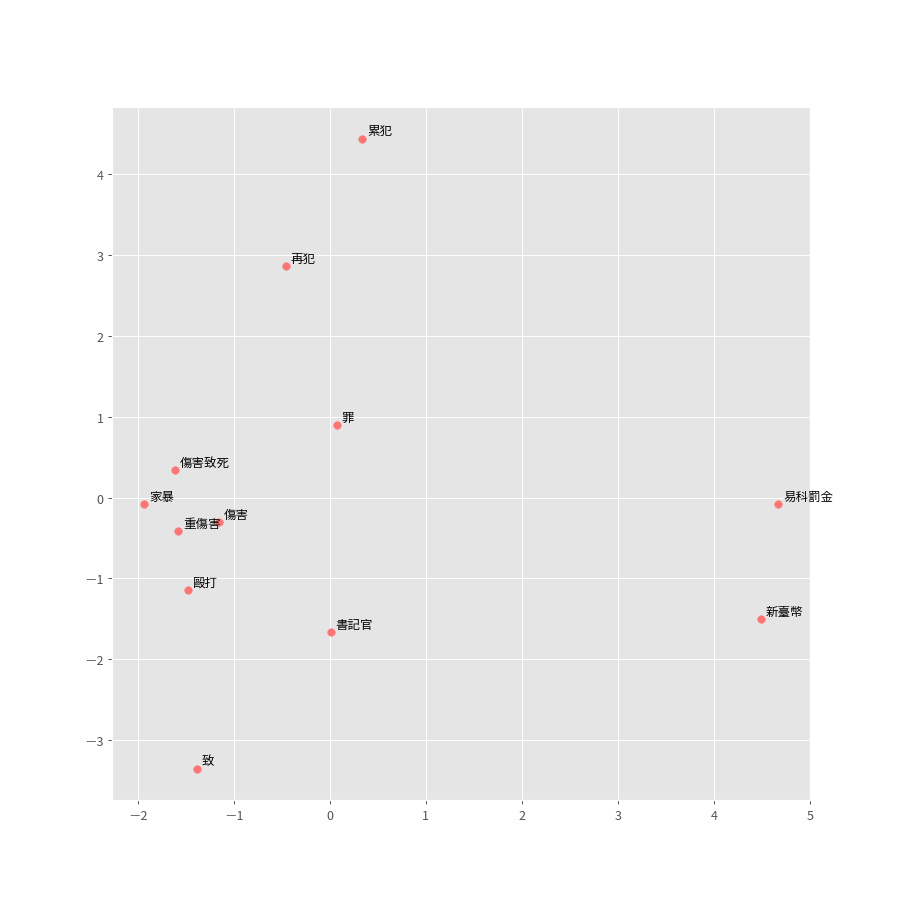

In [10]:
display_pca_scatterplot(model, ['傷害', '重傷害', '傷害致死', '新臺幣', '家暴', '易科罰金', '毆打', '累犯', '再犯', '書記官', '致', '罪'], sample=500)

### 降維 test

In [28]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pca
from sklearn.decomposition import PCA

In [29]:
# 查看詞向量
vec1 = model.wv['傷害']
vec1

array([-1.52907938e-01,  1.00410950e+00,  1.10781589e-03, -3.69494915e-01,
       -1.71492398e-01, -1.48895413e-01,  2.15256229e-01,  5.20328321e-02,
       -2.14576572e-02, -6.75072446e-02, -6.59449458e-01, -5.92062473e-01,
       -8.45132589e-01,  4.03052807e-01, -3.96031916e-01, -1.46638215e-01,
        3.86772662e-01,  5.59497714e-01,  3.66411209e-01, -8.37202147e-02,
       -4.02789146e-01, -3.23616534e-01, -9.10355300e-02,  8.80589664e-01,
        5.58567643e-02,  8.50631833e-01, -8.82473528e-01,  3.70455027e-01,
        8.66108775e-01,  9.08432305e-02,  1.31682903e-01,  5.79618692e-01,
       -9.04530436e-02, -4.85795408e-01,  2.61890143e-01, -3.88527453e-01,
       -4.05267179e-01, -2.47979581e-01, -3.24091136e-01,  2.24861786e-01,
        2.47231945e-01,  2.66549766e-01, -1.14722192e+00, -6.55316934e-02,
        1.67923927e-01,  7.93587714e-02, -5.84429801e-01,  4.76468265e-01,
        4.01702344e-01,  2.63261616e-01,  7.31865942e-01,  1.18688978e-01,
       -8.97536397e-01,  

In [36]:
pca.fit(vec1)
print(pca.explained_variance_)

ValueError: Expected 2D array, got 1D array instead:
array=[-1.52907938e-01  1.00410950e+00  1.10781589e-03 -3.69494915e-01
 -1.71492398e-01 -1.48895413e-01  2.15256229e-01  5.20328321e-02
 -2.14576572e-02 -6.75072446e-02 -6.59449458e-01 -5.92062473e-01
 -8.45132589e-01  4.03052807e-01 -3.96031916e-01 -1.46638215e-01
  3.86772662e-01  5.59497714e-01  3.66411209e-01 -8.37202147e-02
 -4.02789146e-01 -3.23616534e-01 -9.10355300e-02  8.80589664e-01
  5.58567643e-02  8.50631833e-01 -8.82473528e-01  3.70455027e-01
  8.66108775e-01  9.08432305e-02  1.31682903e-01  5.79618692e-01
 -9.04530436e-02 -4.85795408e-01  2.61890143e-01 -3.88527453e-01
 -4.05267179e-01 -2.47979581e-01 -3.24091136e-01  2.24861786e-01
  2.47231945e-01  2.66549766e-01 -1.14722192e+00 -6.55316934e-02
  1.67923927e-01  7.93587714e-02 -5.84429801e-01  4.76468265e-01
  4.01702344e-01  2.63261616e-01  7.31865942e-01  1.18688978e-01
 -8.97536397e-01  5.54821551e-01 -8.94928575e-02 -4.94842529e-02
  3.40490490e-01 -9.30284023e-01  1.07731186e-01  9.67133164e-01
 -1.36354446e-01 -1.02393419e-01  6.76107481e-02  1.82669416e-01
 -2.56240964e-01 -4.58610535e-01  6.35785520e-01  6.89046085e-01
  1.13345154e-01 -4.03003901e-01 -2.09313426e-02  3.93626727e-02
 -2.33133107e-01  9.42798108e-02  5.98704278e-01 -1.96020052e-01
  4.02607262e-01  1.97985038e-01 -4.03890461e-01  4.42010939e-01
  5.12850702e-01  6.21844113e-01  2.75687188e-01  1.70779992e-02
 -8.35002959e-01  2.95573622e-01  2.03279689e-01  1.02932841e-01
 -2.23545849e-01  1.69135585e-01  5.17550886e-01  5.82495034e-02
 -5.18062711e-01 -2.17441246e-01 -6.51554540e-02  1.18534997e-01
  8.01242590e-01 -4.85046096e-02  8.12576413e-02  2.14820385e-01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [31]:
 X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

In [32]:
pca = PCA(n_components=2)

In [34]:
pca.fit(X)

PCA(n_components=2)

In [35]:
print(pca.explained_variance_ratio_)

[0.99244289 0.00755711]


In [37]:
print(pca.singular_values_)

[6.30061232 0.54980396]


In [38]:
pca = PCA(n_components=2, svd_solver='full')

In [39]:
pca.fit(X)

PCA(n_components=2, svd_solver='full')

In [40]:
 print(pca.explained_variance_ratio_)

[0.99244289 0.00755711]


In [41]:
print(pca.singular_values_)

[6.30061232 0.54980396]
